<a href="https://colab.research.google.com/github/shivani-nandani/rumor-spread/blob/main/SIHCR_Trust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- alpha: probability that S mistrusts I (mistrust probability)
- beta: factor to gamma (untrustworthy neighbor) (mistrust factor)
- gamma: probability that S becomes I when S contacts I (spreading rate)
- theta: prob that S becomes C when S contacts I (refuting rate)
- eta: prob that S becomes R when S contacts I (ignoring rate)
- delta: prob that I becomes R when I contacts I, H, R (stifling rate)
- xi: prob that I becomes R when C contacts I 
(persuading rate)
- pi: prob that I becomes H (indepedent)
(forgetting rate)
- mu: prob that H becomes I (independent)
(spontaneous remembering rate)
- omega: prob that H becomes I when H contacts I
(wakened remembering rate)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random as rd

In [2]:
sihcr_color = dict()
sihcr_color['s'] = 'limegreen'
sihcr_color['i'] = 'red'
sihcr_color['h'] = 'gold'
sihcr_color['c'] = 'blue'
sihcr_color['r'] = 'purple'
sihcr_color

{'c': 'blue', 'h': 'gold', 'i': 'red', 'r': 'purple', 's': 'limegreen'}

In [3]:
N = 5000 # population

# probabilities
alpha = 0.6
beta = 0.8
gamma = 0.7
theta = 0.2
eta = 0.4
delta = 0.5
xi = 0.8
pi = 0.6
mu = 0.5
omega = 0.3


# homogenous network
k = 6   # degree

start = 0
end = 10
dt = 0.01
t = np.arange(start, end, dt)
n = int((end-start)/dt)

In [4]:
color_map = np.empty(N).astype(str)

color_map[:] = sihcr_color['s']
color_map[rd.randint(0,N-1)] = sihcr_color['i']

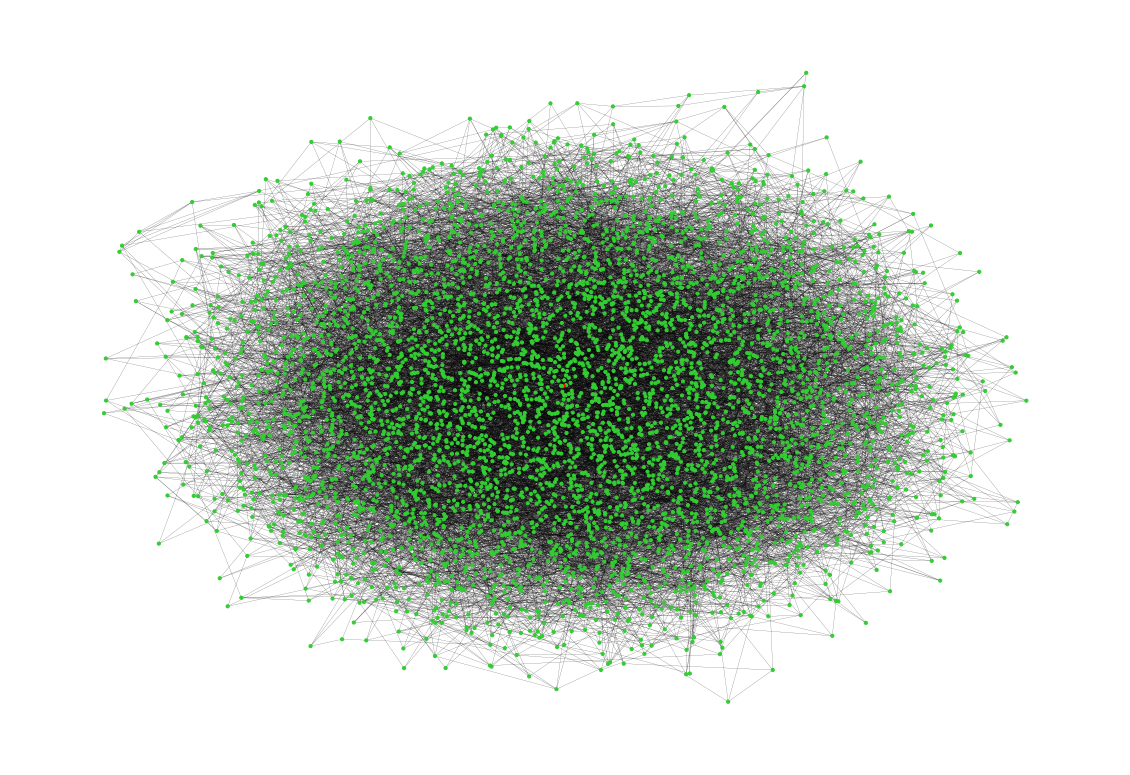

In [5]:
G = nx.connected_watts_strogatz_graph(n = N, k = k, p = 0.5, tries=100)

pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=color_map)

In [6]:
for t in range(1, n):
    for i in range(G.number_of_nodes()):
        prob = rd.random()

        # if node is susceptible and at least one neighboring node is infected
        if color_map[i] == sihcr_color['s'] and sihcr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            trust = rd.random()
            path = rd.randint(0,2)
            # s -> i
            if path == 0:
                if trust < alpha:   # not trusted
                    if prob < beta*gamma:
                        color_map[i] = sihcr_color['i']
                else:               # trusted 
                    if prob < gamma:
                        color_map[i] = sihcr_color['i']
            # s -> c
            elif path == 1:
                if trust < alpha:   # not trusted
                    if prob < theta:
                        color_map[i] = sihcr_color['c']
                else:               # trusted 
                    if prob < beta*theta:
                        color_map[i] = sihcr_color['c']
            # s -> r
            else:
                if trust < alpha:   # not trusted
                    if prob < eta:
                        color_map[i] = sihcr_color['r']
                else:               # trusted 
                    if prob < beta*eta:
                        color_map[i] = sihcr_color['r']
            
        # if node is infected and at least one neighboring node is infected or hibernated or recovered 
        elif color_map[i] == sihcr_color['i'] and (sihcr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]] or
                                                   sihcr_color['h'] in [color_map[j] for j in [n for n in G.neighbors(i)]] or
                                                   sihcr_color['r'] in [color_map[j] for j in [n for n in G.neighbors(i)]]):
            if prob < delta:
                color_map[i] = sihcr_color['r']

        # if node is counterattack and at least one neighboring nodes is infected
        elif color_map[i] == sihcr_color['c'] and sihcr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            if prob < xi:
                for n in G.neighbors(i):
                    if color_map[n] == sihcr_color['i']:
                        color_map[n] = sihcr_color['r']
        
        # if node is hibernated and at least one neighboring node is infected
        elif color_map[i] == sihcr_color['h'] and sihcr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            if prob < omega:
                color_map[i] = sihcr_color['i']
        
        # forgetting mechanism
        forget = rd.random()
        if color_map[i] == sihcr_color['i']:
            if forget < pi:
                color_map[i] = sihcr_color['h']
                continue

        # remembering mechanism
        remember = rd.random()
        if color_map[i] == sihcr_color['h']:
            if remember < mu:
                color_map[i] = sihcr_color['i']
                continue

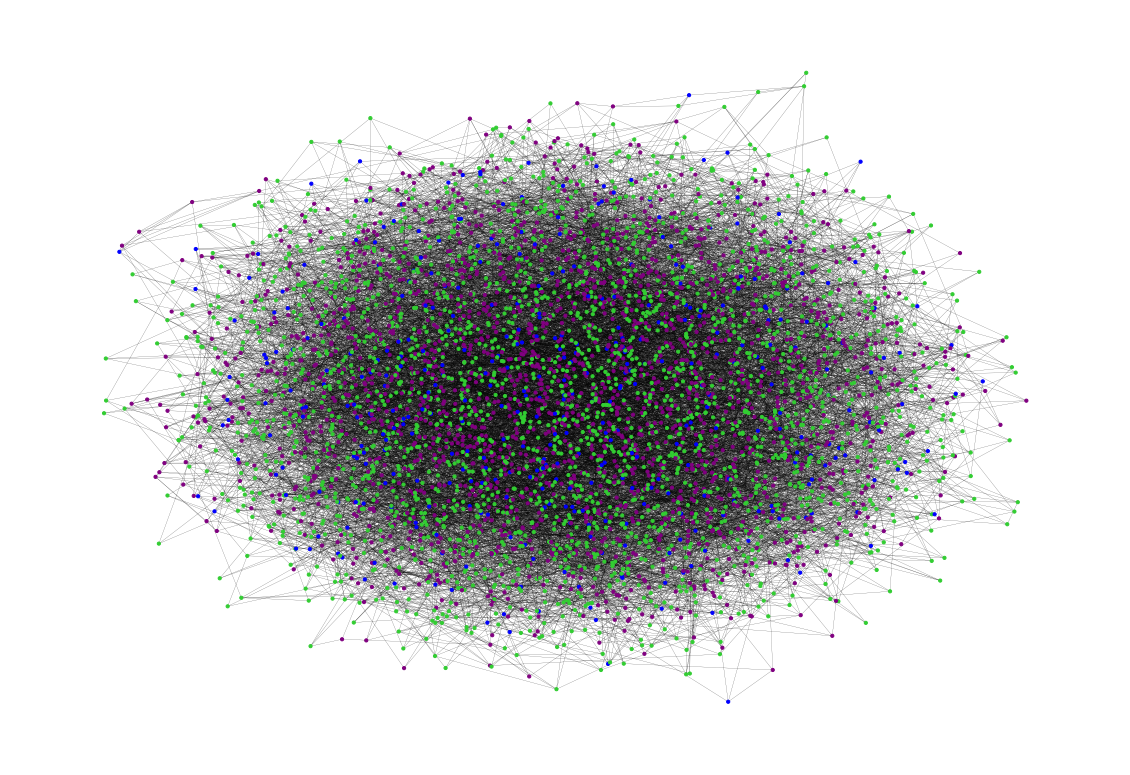

In [7]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=color_map)

In [8]:
num_s = 0
num_i = 0
num_h = 0
num_c = 0
num_r = 0
for i in range(G.number_of_nodes()):
    num_s += sum([sihcr_color['s']==color_map[i]])
    num_i += sum([sihcr_color['i']==color_map[i]])
    num_h += sum([sihcr_color['h']==color_map[i]])
    num_c += sum([sihcr_color['c']==color_map[i]])
    num_r += sum([sihcr_color['r']==color_map[i]])
    
print('Fraction Susceptible = ', num_s/N)
print('Fraction Infective = ', num_i/N)
print('Fraction Hibernated = ', num_h/N)
print('Fraction Counterattack = ', num_c/N)
print('Fraction Refractory = ', num_r/N)

Fraction Susceptible =  0.5054
Fraction Infective =  0.0
Fraction Hibernated =  0.0
Fraction Counterattack =  0.0806
Fraction Refractory =  0.414
